In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


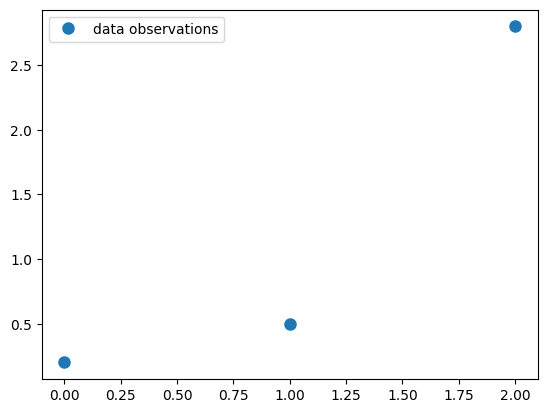

In [ ]:
x_data = np.array([0,1,2]).reshape(3,1)
t_data = np.array([0.2,0.5,2.8]).reshape(3,1)

plt.plot(x_data, t_data, 'o', markersize=8, label='data observations')
plt.legend()
plt.show()

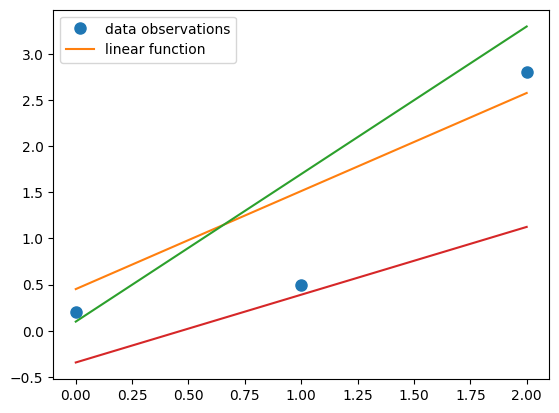

In [ ]:
np.random.seed(42)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
plt.plot(x_data, t_data,'o', markersize = 8, label = 'data observations')


## Create several possible functions that our specific neural network can implement
for i in range(3):
    
    # domain over where we want to plot the function implemented by the model.
    x_range = np.linspace(0 , 2, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our models
    w = np.random.uniform(0.5, 2.0)  
    b = np.random.uniform(-0.5, 0.5)

    # projection from input x to output y through computational graph
    y_range = w*x_range + b # w*x + b

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_data = w*x_data + b # w*x + b

    if i == 0:
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'linear function' )
    else:
        plt.plot(x_range,y_range, color = f"C{i+1}")

plt.legend(loc = 'upper left')

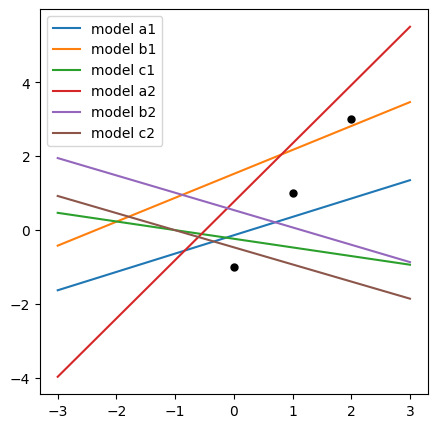

Pérdida total (L2): 23.302
Pérdida total (L1): 5.937


In [ ]:
## fix seed so that randomness is controlled.
np.random.seed(42)

## number of points in the domain used to plot the functions 
N_points_domain = 10

## domain over where we want to plot the function implemented by the NNet
x_range = np.linspace(-3 ,3, N_points_domain).reshape((N_points_domain,1))

## display data again
fig, ax  = plt.subplots(1,1, figsize=(5,5))  
    
## =========================================================================================
## Create several possible functions that our specific neural network can implement and plot

# to save parameters to use later
y_true = 2 * x_data - 1

w_save = []
b_save = []

def squared_loss_function():
    total_loss = 0
    for i, model_id in zip(range(3),['a2','b2','c2']):

        # initialize one of our networks
        w = np.random.randn(1)
        b = np.random.randn(1)

        # projection from input x to output y through computational graph
        y_range = w * x_range + b

        # check how this computational_graph predicts at the inputs denote by our observed data X.
        y_data = w * x_data + b
        
        # Compute the loss and display:
        loss = (y_data - y_true)**2 # call your loss function implemented

        total_loss = float(np.sum(loss)) # the total loss is the sum of per element losses

        ax.plot(x_range, y_range, label=f'model {model_id}') 

    return total_loss

def absolute_loss_function():
    total_loss = 0
    for i, model_id in zip(range(3),['a1','b1','c1']):

        # initialize one of our networks
        w = np.random.randn(1)
        b = np.random.randn(1)

        # projection from input x to output y through computational graph
        y_range = w * x_range + b

        # check how this computational_graph predicts at the inputs denote by our observed data X.
        y_data = w * x_data + b
        
        # Compute the loss and display:
        loss = np.abs(y_data - y_true) # call your loss function implemented

        total_loss = float(np.sum(loss)) # the total loss is the sum of per element losses

        ax.plot(x_range, y_range, label=f'model {model_id}') 

    return total_loss

total_loss_manhattan = absolute_loss_function()    
total_loss_square = squared_loss_function()


ax.scatter(x_data, y_true, color='black', s=25)
ax.legend()
plt.show()

print(f"Pérdida total (L2): {total_loss_square:.3f}")
print(f"Pérdida total (L1): {total_loss_manhattan:.3f}")

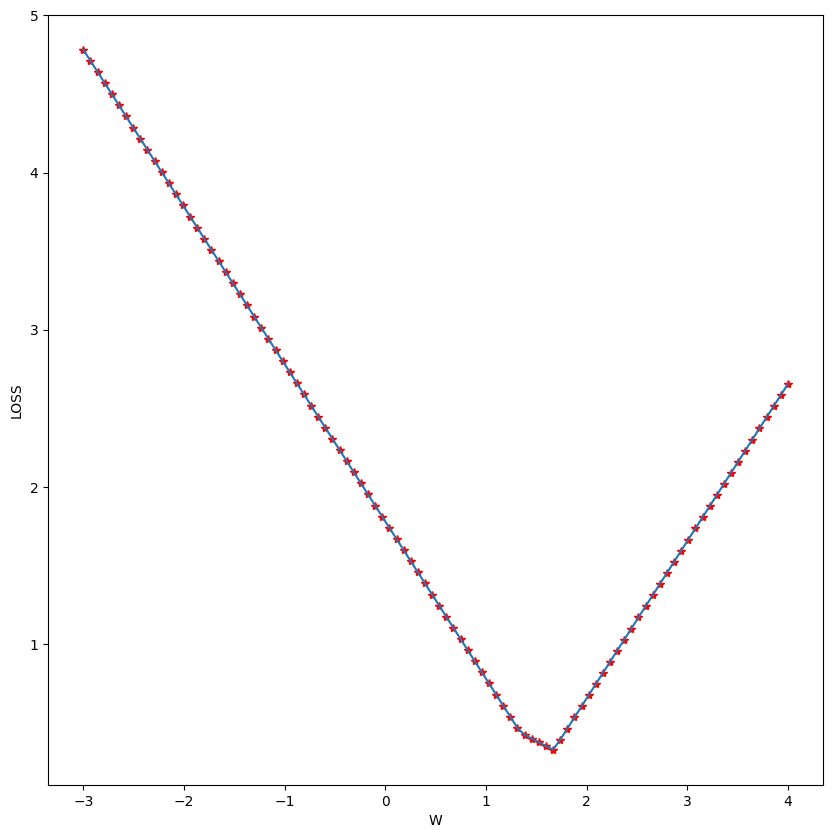

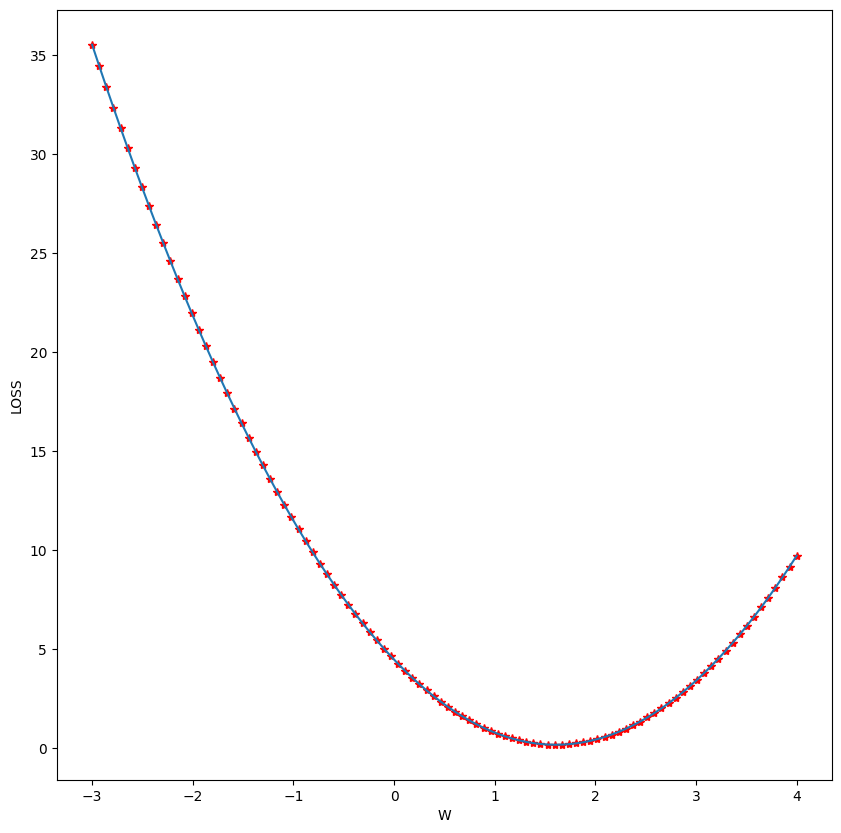

In [ ]:
## ======================== ##
## Simulation configuration ##
## ======================== ##
fixed_bias = 0.5

## ================ ##
## For plot display ##
## ================ ##
## create figure box


## ================================================================================
## Create several possible functions that our specific neural network can implement

# to save individual losses, expected losses and parameters used


# Compute the loss function over 100 possible models.
def compute_manhattan():
    fig, ax = plt.subplots(1,1, figsize = (10,10))
    expected_loss_acc = []
    w_range = [] 
    w_acc = []
    for w in np.linspace(-3,4,100):
        
        # check how this computational_graph predicts at the inputs denote by our observed data X.
        y_data = w * x_data + b
            
        # compute the loss at the predictions
        loss = np.mean(np.abs(y_data - y_true)) # use the function you created

        # accumulate the loss and save both individual and accumulated losses
        expected_loss_acc.append(loss)
            
        # save parameter used to compute the loss
        w_range.append(np.squeeze(w))

    ax.plot(w_range,expected_loss_acc, '*', color = 'red')
    ax.plot(w_range,expected_loss_acc)
    ax.set_xlabel("W")
    ax.set_ylabel("LOSS")
    plt.show()

def compute_SQR():
    fig, ax = plt.subplots(1,1, figsize = (10,10))
    expected_loss_acc = []
    w_range = [] 
    w_acc = []
    for w in np.linspace(-3,4,100):
            # check how this computational_graph predicts at the inputs denote by our observed data X.
            y_data = w * x_data + b
                
            # compute the loss at the predictions
            loss = np.mean((y_data - y_true)**2) # use the function you created

            # accumulate the loss and save both individual and accumulated losses
            expected_loss_acc.append(loss)
                
            # save parameter used to compute the loss
            w_range.append(np.squeeze(w))

    ax.plot(w_range,expected_loss_acc, '*', color = 'red')
    ax.plot(w_range,expected_loss_acc,)
    ax.set_xlabel("W")
    ax.set_ylabel("LOSS")
    plt.show()

compute_manhattan()
compute_SQR()      

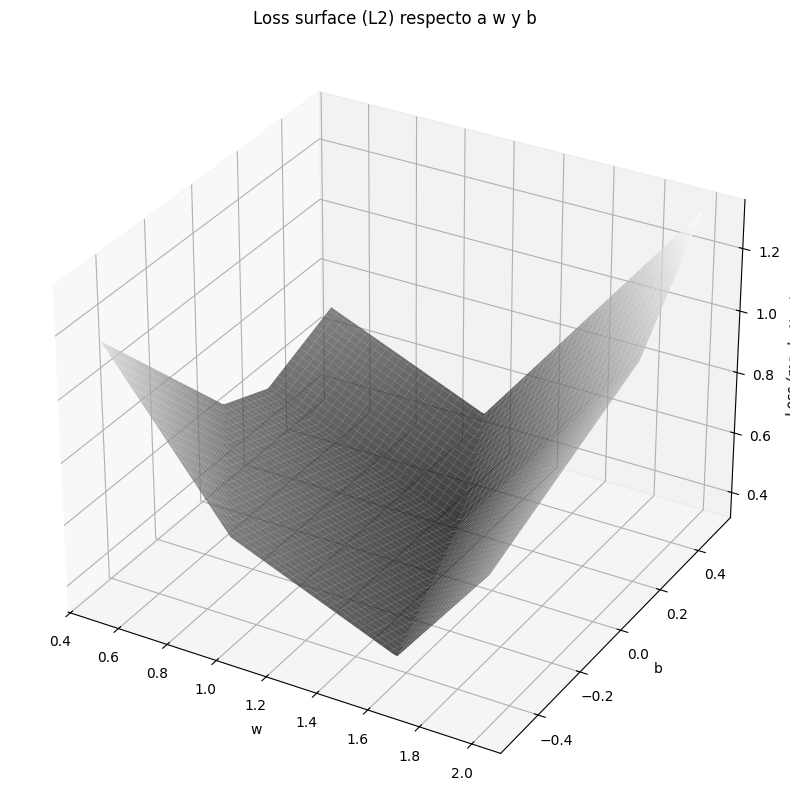

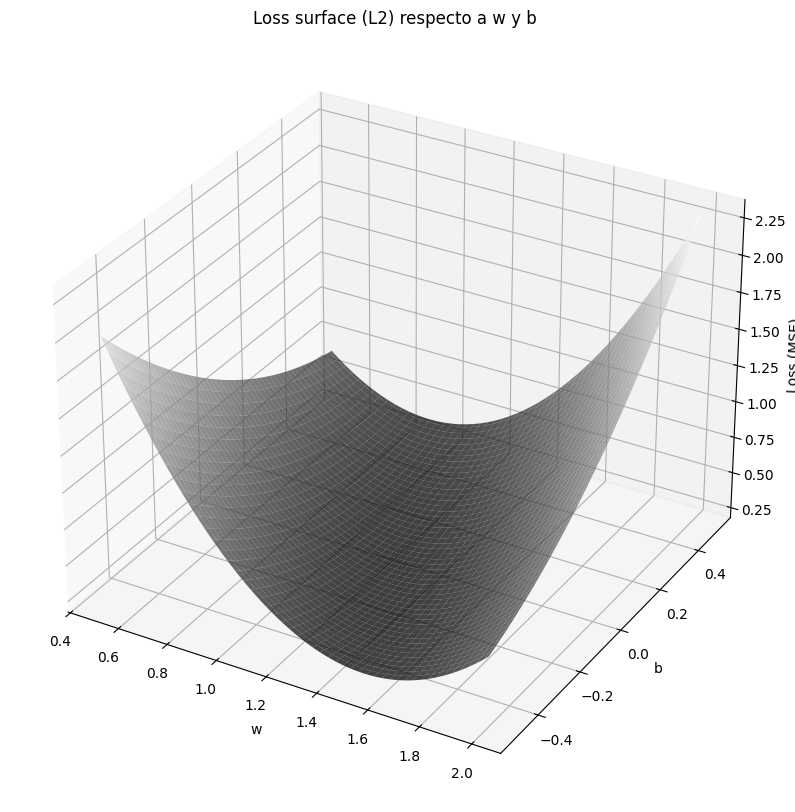

In [ ]:
np.random.seed(42)

## ===================================================================================================
## Create several possible functions that our specific neural network can implement and compute losses
def square_eucledian():
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ## To do so we need a mesh
    w = np.linspace(0.5, 2.0, 100)
    b = np.linspace(-0.5, 0.5, 100)
    w_mesh, b_mesh = np.meshgrid(w ,b)

    #Añadimos una nueva dimension en w, otra en b, y para X 
    y_data_mesh = w_mesh[..., None] * x_data.ravel()[None, None, :] + b_mesh[..., None]


    # compute loss
    expected_loss_mesh = np.mean((y_data_mesh - t_data.ravel()[None, None, :])**2, axis=-1)
        

    ## display loss functions
    ax.plot_surface(w_mesh, b_mesh, expected_loss_mesh, cmap = 'gray', alpha = 0.75 )
    ax.set_xlabel("w")
    ax.set_ylabel("b")
    ax.set_zlabel("Loss (MSE)")
    ax.set_title("Loss surface (L2) respecto a w y b")
    plt.show()

def manhattan_distance():

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
 ## To do so we need a mesh
    w = np.linspace(0.5, 2.0, 100)
    b = np.linspace(-0.5, 0.5, 100)
    w_mesh, b_mesh = np.meshgrid(w ,b)

    #Añadimos una nueva dimension en w, otra en b, y para X 
    y_data_mesh = w_mesh[..., None] * x_data.ravel()[None, None, :] + b_mesh[..., None]


    # compute loss
    expected_loss_mesh = np.mean(np.abs(y_data_mesh - t_data.ravel()[None, None, :]), axis=-1)
        

    ## display loss functions
    ax.plot_surface(w_mesh, b_mesh, expected_loss_mesh, cmap = 'gray', alpha = 0.75 )
    ax.set_xlabel("w")
    ax.set_ylabel("b")
    ax.set_zlabel("Loss (manhattan)")
    ax.set_title("Loss surface (L2) respecto a w y b")
    plt.show()


manhattan_distance()
square_eucledian()


In [ ]:
def grad_squared_loss_wrt_linear_model(x,t,w,b):
    
    x = np.asarray(x).ravel()
    t = np.asarray(t).ravel()
    N = len(x)
    y_pred = w * x + b
    error = y_pred - t

    grad_w = (2/N) * np.sum(error * x)
    grad_b = (2/N) * np.sum(error)

    return grad_w, grad_b

def grad_absolute_loss_wrt_linear_model(x,t,w,b):
    x = np.asarray(x).ravel()
    t = np.asarray(t).ravel()
    N = len(x)
    y_pred = w * x + b
    sign = np.sign(x)
    grad_w = (1/N) * np.sum(sign * x)
    grad_b = (1/N) * np.sum(sign)
    

    return grad_w, grad_b